In [1]:
!pip install networkx==2.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as math
import time 
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [14,14]

In [3]:
df = pd.read_csv('drive/MyDrive/NetworkX/Data/netflix_titles.csv')

In [ ]:
df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

In [4]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month
df['day'] = df['date_added'].dt.day

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6234 non-null   int64         
 1   type          6234 non-null   object        
 2   title         6234 non-null   object        
 3   director      4265 non-null   object        
 4   cast          5664 non-null   object        
 5   country       5758 non-null   object        
 6   date_added    6223 non-null   datetime64[ns]
 7   release_year  6234 non-null   int64         
 8   rating        6224 non-null   object        
 9   duration      6234 non-null   object        
 10  listed_in     6234 non-null   object        
 11  description   6234 non-null   object        
 12  year          6223 non-null   float64       
 13  month         6223 non-null   float64       
 14  day           6223 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int6

In [6]:
df.isna().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
year              11
month             11
day               11
dtype: int64

In [7]:
df['directors'] = df['director'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])

In [8]:
df['categories'] = df['listed_in'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
df['actors'] = df['cast'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
df['countries'] = df['country'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])

In [9]:
print(df.shape)

(6234, 19)


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.cluster import MiniBatchKMeans

In [11]:
text_content = df['description']
vector = TfidfVectorizer(max_df=0.4,         
                             min_df=1,     
                             stop_words='english', 
                             lowercase=True, 
                             use_idf=True,  
                             norm=u'l2',     
                             smooth_idf=True 
                            )

In [12]:
tfidf = vector.fit_transform(text_content)

In [13]:
# Clustering  Kmeans
k = 200
kmeans = MiniBatchKMeans(n_clusters = k)
kmeans.fit(tfidf)
centers = kmeans.cluster_centers_.argsort()[:,::-1]
terms = vector.get_feature_names_out()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
# print the centers of the clusters
#for i in range(0,k):
#  word_list=[]
#  for j in centers[i,:10]:
#    word_list.append(terms[j])
#  print(word_list) 

In [15]:
request_transform = vector.transform(df['description'])
# new column cluster based on the description
df['cluster'] = kmeans.predict(request_transform) 

In [16]:
df['cluster'].value_counts().head()

47     4696
102     636
23      211
133     207
30      136
Name: cluster, dtype: int64

In [ ]:
df.head(5)

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country date_added  release_year  \
0  United States, India, South Korea, China 2019-09-09          2019   
1                            United Kingdom 2016-09-09          2016   
2                             United States 2018-09-08          2013   
3                             United States 2018-09-08          2016   
4                             United States 2017-09-08          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description    year  month  day  \
0  Before planning an awesome wedding for his gra...  2019.0    9.0  9.0   
1  Jandino Asporaat riffs on the challenges of ra...  2016.0    9.0  9.0   
2  With the help of three human allies, the Autob...  2018.0    9.0  8.0   
3  When a prison ship crash unleashes hundreds of...  2018.0    9.0  8.0   
4  When nerdy high schooler Dani finally attracts...  2017.0    9.0  8.0   

                    directors                            categories  \
0  [Richard Finn, Tim Maltby]  [Children & Family Movies, Comedies]   
1                          []                     [Stand-Up Comedy]   
2                          []                            [Kids' TV]   
3                          []                            [Kids' TV]   
4          [Fernando Lebrija]                            [Comedies]   

                                              actors  \
0  [Alan Marriott, Andrew Toth, Brian Dobson, Col...   
1                                 [Jandino Asporaat]   
2  [Peter Cullen, Sumalee Montano, Frank Welker, ...   
3  [Will Friedle, Darren Criss, Constance Zimmer,...   
4  [Nesta Cooper, Kate Walsh, John Michael Higgin...   

                                    countries  cluster  
0  [United States, India, South Korea, China]      113  
1                            [United Kingdom]      113  
2                             [United States]       14  
3                             [United States]      113  
4                             [United States]      113

In [17]:
# Find similar : get the top_n movies with description similar to the target description 
def find_similar(tfidf, index, top_n = 5):
    cosine_similarities = linear_kernel(tfidf[index:index+1], tfidf).flatten()
    related_docs_indices = [i for i in cosine_similarities.argsort()[::-1] if i != index]
    return [index for index in related_docs_indices][0:top_n]  

In [18]:
G = nx.Graph(label="MOVIE")
start_time = time.time()
for i, rowi in df.iterrows():
    if (i%1000==0):
        print(" iter {} -- {} seconds --".format(i,time.time() - start_time))
    G.add_node(rowi['title'],key=rowi['show_id'],label="MOVIE",mtype=rowi['type'],rating=rowi['rating'])
#    G.add_node(rowi['cluster'],label="CLUSTER")
#    G.add_edge(rowi['title'], rowi['cluster'], label="DESCRIPTION")
    for element in rowi['actors']:
        G.add_node(element,label="PERSON")
        G.add_edge(rowi['title'], element, label="ACTED_IN")
    for element in rowi['categories']:
        G.add_node(element,label="CAT")
        G.add_edge(rowi['title'], element, label="CAT_IN")
    for element in rowi['directors']:
        G.add_node(element,label="PERSON")
        G.add_edge(rowi['title'], element, label="DIRECTED")
    for element in rowi['countries']:
        G.add_node(element,label="COU")
        G.add_edge(rowi['title'], element, label="COU_IN")
    
    indices = find_similar(tfidf, i, top_n = 5)
    snode="Sim("+rowi['title'][:15].strip()+")"        
    G.add_node(snode,label="SIMILAR")
    G.add_edge(rowi['title'], snode, label="SIMILARITY")
    for element in indices:
        G.add_edge(snode, df['title'].loc[element], label="SIMILARITY")
print(" finish -- {} seconds --".format(time.time() - start_time))

 iter 0 -- 0.013267755508422852 seconds --
 iter 1000 -- 3.1753599643707275 seconds --
 iter 2000 -- 6.4881250858306885 seconds --
 iter 3000 -- 10.076081037521362 seconds --
 iter 4000 -- 13.706600904464722 seconds --
 iter 5000 -- 16.925501823425293 seconds --
 iter 6000 -- 20.287450075149536 seconds --
 finish -- 21.04264187812805 seconds --


In [19]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 42949
Number of edges: 106506
Average degree:   4.9596


In [20]:
G.nodes

NodeView(('Norm of the North: King Sized Adventure', 'Alan Marriott', 'Andrew Toth', 'Brian Dobson', 'Cole Howard', 'Jennifer Cameron', 'Jonathan Holmes', 'Lee Tockar', 'Lisa Durupt', 'Maya Kay', 'Michael Dobson', 'Children & Family Movies', 'Comedies', 'Richard Finn', 'Tim Maltby', 'United States', 'India', 'South Korea', 'China', 'Sim(Norm of the Nor)', 'Norm of the North: Keys to the Kingdom', 'Ottaal', 'We Bare Bears', 'Pororo - The Little Penguin', 'Man vs Wild with Sunny Leone', 'Jandino: Whatever it Takes', 'Jandino Asporaat', 'Stand-Up Comedy', 'United Kingdom', 'Sim(Jandino: Whatev)', 'Katt Williams: Great America', 'Garfunkel and Oates: Trying to be Special', "Jen Kirkman: I'm Gonna Die Alone (And I Feel Fine)", 'George of the Jungle 2', 'Joe Rogan: Triggered', 'Transformers Prime', 'Peter Cullen', 'Sumalee Montano', 'Frank Welker', 'Jeffrey Combs', 'Kevin Michael Richardson', 'Tania Gunadi', 'Josh Keaton', 'Steve Blum', 'Andy Pessoa', 'Ernie Hudson', 'Daran Norris', 'Will Fr

In [ ]:
G.edges

EdgeView([('Norm of the North: King Sized Adventure', 'Alan Marriott'), ('Norm of the North: King Sized Adventure', 'Andrew Toth'), ('Norm of the North: King Sized Adventure', 'Brian Dobson'), ('Norm of the North: King Sized Adventure', 'Cole Howard'), ('Norm of the North: King Sized Adventure', 'Jennifer Cameron'), ('Norm of the North: King Sized Adventure', 'Jonathan Holmes'), ('Norm of the North: King Sized Adventure', 'Lee Tockar'), ('Norm of the North: King Sized Adventure', 'Lisa Durupt'), ('Norm of the North: King Sized Adventure', 'Maya Kay'), ('Norm of the North: King Sized Adventure', 'Michael Dobson'), ('Norm of the North: King Sized Adventure', 'Children & Family Movies'), ('Norm of the North: King Sized Adventure', 'Comedies'), ('Norm of the North: King Sized Adventure', 'Richard Finn'), ('Norm of the North: King Sized Adventure', 'Tim Maltby'), ('Norm of the North: King Sized Adventure', 'United States'), ('Norm of the North: King Sized Adventure', 'India'), ('Norm of the

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 1610 (\N{ARABIC LETTER YEH}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Matplotlib currently does not support Arabic natively.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 1608 (\N{ARABIC LETTER WAW}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 1605 (\N{ARABIC LETTER MEEM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 1575 (\N{ARABIC LETTER ALEF}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 1604 (\N{ARABIC LETTER LAM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/

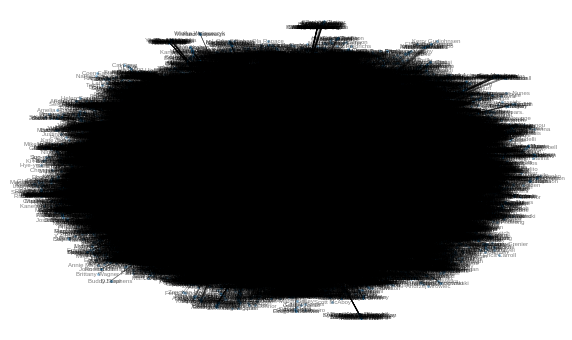

In [ ]:
#fig, ax = plt.subplots(1, 1, figsize=(10, 6))
#nx.draw_networkx(G, ax=ax, node_size=5,
#                 font_size=6, alpha=.5,
#                 width=.5)
#ax.set_axis_off()

In [21]:
# Calculate the degree centrality for each node
degree_centrality = nx.degree_centrality(G)
degree_centrality

{'Norm of the North: King Sized Adventure': 0.0004889633975970942,
 'Alan Marriott': 6.985191394244202e-05,
 'Andrew Toth': 6.985191394244202e-05,
 'Brian Dobson': 0.00011641985657073671,
 'Cole Howard': 6.985191394244202e-05,
 'Jennifer Cameron': 4.6567942628294685e-05,
 'Jonathan Holmes': 9.313588525658937e-05,
 'Lee Tockar': 0.00013970382788488405,
 'Lisa Durupt': 2.3283971314147342e-05,
 'Maya Kay': 4.6567942628294685e-05,
 'Michael Dobson': 0.0001629877991990314,
 'Children & Family Movies': 0.008778057185433548,
 'Comedies': 0.025891776101331844,
 'Richard Finn': 2.3283971314147342e-05,
 'Tim Maltby': 4.6567942628294685e-05,
 'United States': 0.06049175747415479,
 'India': 0.019418832075998885,
 'South Korea': 0.0037487193815777223,
 'China': 0.0027707925863835335,
 'Sim(Norm of the Nor)': 0.0002561236844556208,
 'Norm of the North: Keys to the Kingdom': 0.0005820992828536836,
 'Ottaal': 0.0005355313402253889,
 'We Bare Bears': 0.00041911148365465214,
 'Pororo - The Little Pengui

In [22]:
import operator

In [23]:
sorted_dc = sorted(degree_centrality.items(), key=operator.itemgetter(1), reverse=True)

for node in sorted_dc:
    print(node)

Streaming output truncated to the last 5000 lines.
('Alexandra Ursulyak', 2.3283971314147342e-05)
('Dmitriy Nazarov', 2.3283971314147342e-05)
('Diomid Vinogradov', 2.3283971314147342e-05)
('Elena Shulman', 2.3283971314147342e-05)
('Kseniya Kutepova', 2.3283971314147342e-05)
('Laura Silverman', 2.3283971314147342e-05)
('Cheryl Ladd', 2.3283971314147342e-05)
('Justin Lieberman', 2.3283971314147342e-05)
('Maddie McCormick', 2.3283971314147342e-05)
('Scott Marshall Smith', 2.3283971314147342e-05)
('Krrish Chhabria', 2.3283971314147342e-05)
('Hetal Gada', 2.3283971314147342e-05)
('Rajiv Laxman', 2.3283971314147342e-05)
('Rubén Blades', 2.3283971314147342e-05)
('Eduardo Verástegui', 2.3283971314147342e-05)
('Santiago Cabrera', 2.3283971314147342e-05)
('Adrian Alonso', 2.3283971314147342e-05)
('Mauricio Kuri', 2.3283971314147342e-05)
('Dean Wright', 2.3283971314147342e-05)
('Léa Moret', 2.3283971314147342e-05)
('Camille Shooshani', 2.3283971314147342e-05)
('Ashleigh Aston Moore', 2.3283971314

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 1610 (\N{ARABIC LETTER YEH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 1608 (\N{ARABIC LETTER WAW}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 1605 (\N{ARABIC LETTER MEEM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 1575 (\N{ARABIC LETTER ALEF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py

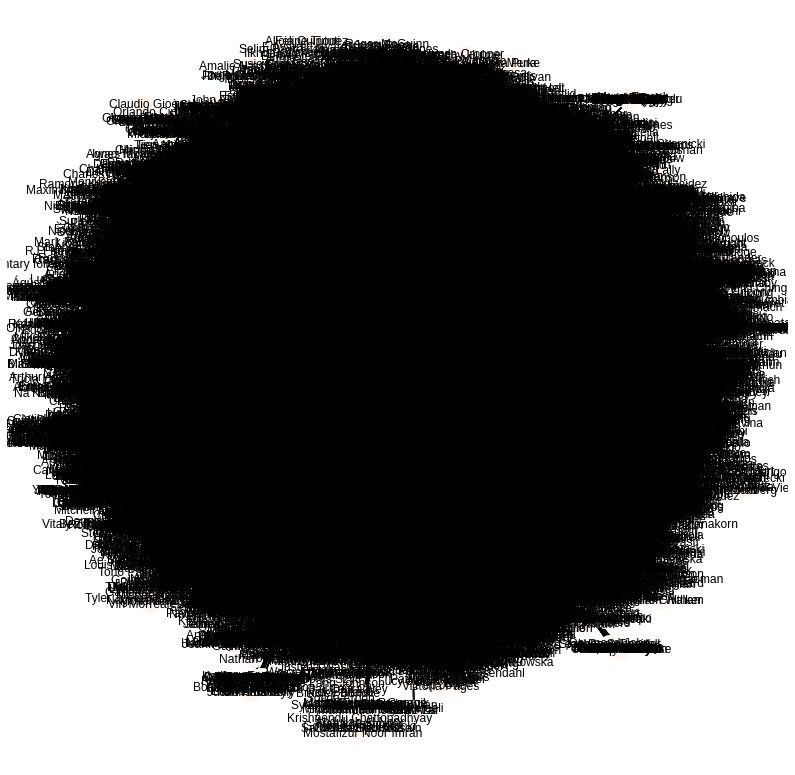

In [24]:
# sort nodes by degree centrality in descending order
sorted_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)

# create a subgraph of the top 10 nodes
#top_nodes = sorted_nodes[:10]
subgraph = G.subgraph(sorted_nodes)

# position nodes using spring layout
pos = nx.spring_layout(subgraph)

# draw the subgraph with nodes colored by degree centrality
nx.draw_networkx_nodes(subgraph, pos, node_color=list(degree_centrality.values()), cmap=plt.cm.Reds)
nx.draw_networkx_edges(subgraph, pos)
nx.draw_networkx_labels(subgraph, pos)

# show the plot
plt.axis('off')
plt.show()

In [25]:
def get_all_adj_nodes(list_in):
    sub_graph=set()
    for m in list_in:
        sub_graph.add(m)
        for e in G.neighbors(m):        
                sub_graph.add(e)
    return list(sub_graph)
def draw_sub_graph(sub_graph):
    subgraph = G.subgraph(sub_graph)
    colors=[]
    for e in subgraph.nodes():
        if G.nodes[e]['label']=="MOVIE":
            colors.append('blue')
        elif G.nodes[e]['label']=="PERSON":
            colors.append('red')
        elif G.nodes[e]['label']=="CAT":
            colors.append('green')
        elif G.nodes[e]['label']=="COU":
            colors.append('yellow')
        elif G.nodes[e]['label']=="SIMILAR":
            colors.append('orange')    
        elif G.nodes[e]['label']=="CLUSTER":
            colors.append('orange')

    nx.draw(subgraph, with_labels=True, font_weight='bold',node_color=colors)
    plt.show()

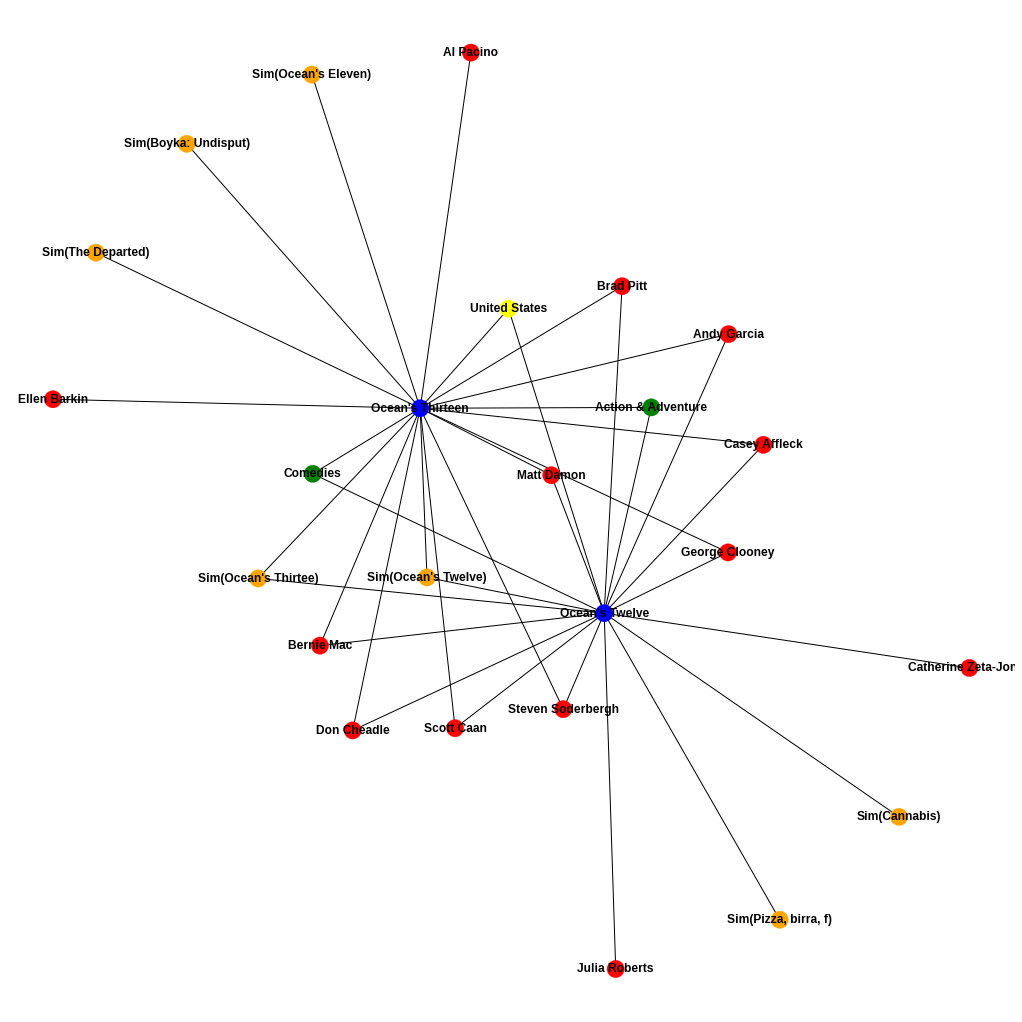

In [26]:
list_in=["Ocean's Twelve","Ocean's Thirteen"]
sub_graph = get_all_adj_nodes(list_in)
draw_sub_graph(sub_graph)

In [27]:
def get_recommendation(root):
    commons_dict = {}
    for e in G.neighbors(root):
        for e2 in G.neighbors(e):
            if e2==root:
                continue
            if G.nodes[e2]['label']=="MOVIE":
                commons = commons_dict.get(e2)
                if commons==None:
                    commons_dict.update({e2 : [e]})
                else:
                    commons.append(e)
                    commons_dict.update({e2 : commons})
    movies=[]
    weight=[]
    for key, values in commons_dict.items():
        w=0.0
        for e in values:
            w=w+1/math.log(G.degree(e))
        movies.append(key) 
        weight.append(w)
    
    result = pd.Series(data=np.array(weight),index=movies)
    result.sort_values(inplace=True,ascending=False)        
    return result;

In [28]:
result = get_recommendation("Ocean's Twelve")
result2 = get_recommendation("Ocean's Thirteen")
result3 = get_recommendation("The Devil Inside")
result4 = get_recommendation("Stranger Things")
print("*"*40+"\n Recommendation for 'Ocean's Twelve'\n"+"*"*40)
print(result.head())
print("*"*40+"\n Recommendation for 'Ocean's Thirteen'\n"+"*"*40)
print(result2.head())
print("*"*40+"\n Recommendation for 'Belmonte'\n"+"*"*40)
print(result3.head())
print("*"*40+"\n Recommendation for 'Stranger Things'\n"+"*"*40)
print(result4.head())

****************************************
 Recommendation for 'Ocean's Twelve'
****************************************
Ocean's Thirteen     7.575565
Ocean's Eleven       1.542593
The Informant!       1.346214
Babel                1.199195
The Mask of Zorro    1.194038
dtype: float64
****************************************
 Recommendation for 'Ocean's Thirteen'
****************************************
Ocean's Twelve       7.575565
Ocean's Eleven       2.100704
The Departed         1.698527
Brooklyn's Finest    1.492545
Boyka: Undisputed    1.400020
dtype: float64
****************************************
 Recommendation for 'Belmonte'
****************************************
The Devil and Father Amorth              1.423117
Making a Murderer                        1.243407
Belief: The Possession of Janet Moses    1.116221
The Autopsy of Jane Doe                  1.032475
The Diabolical                           1.032475
dtype: float64
****************************************
 Recommenda

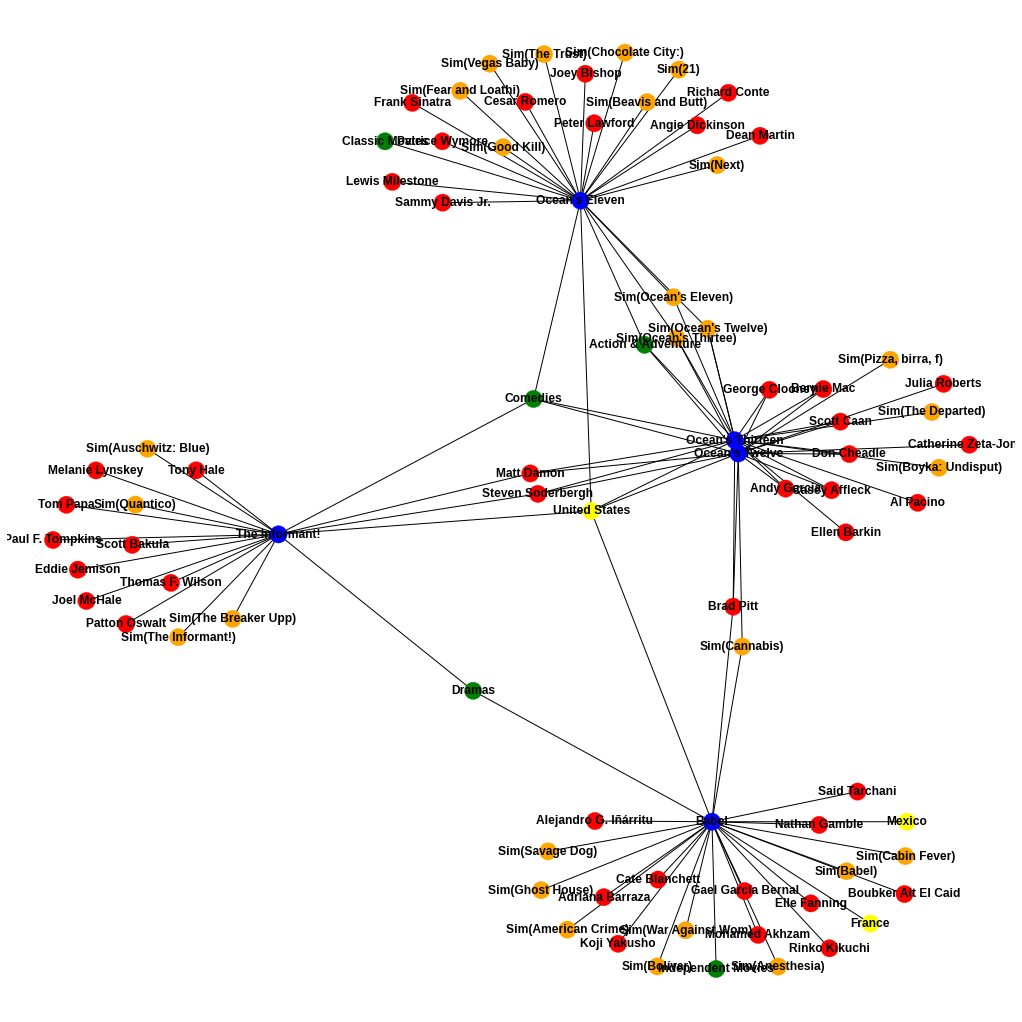

In [29]:
reco=list(result.index[:4].values)
reco.extend(["Ocean's Twelve"])
sub_graph = get_all_adj_nodes(reco)
draw_sub_graph(sub_graph)

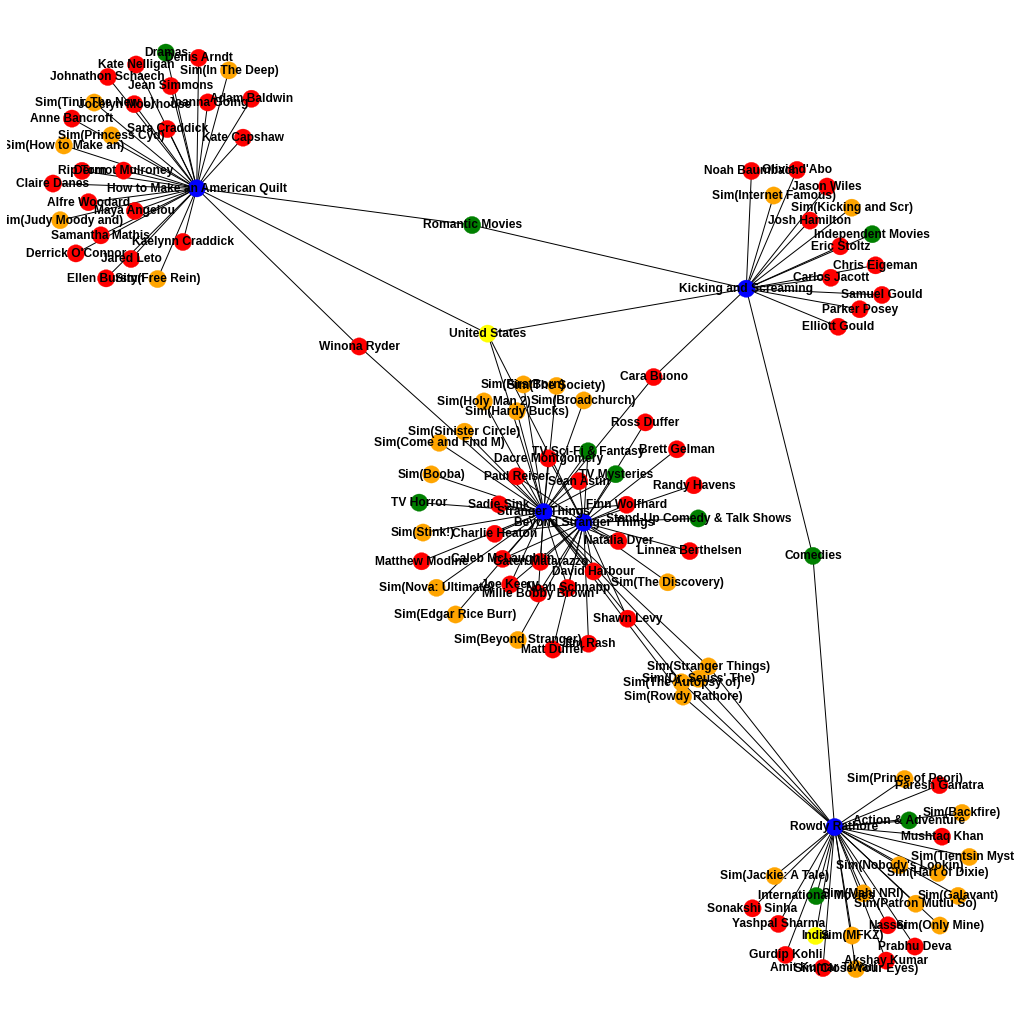

In [30]:
reco=list(result4.index[:4].values)
reco.extend(["Stranger Things"])
sub_graph = get_all_adj_nodes(reco)
draw_sub_graph(sub_graph)

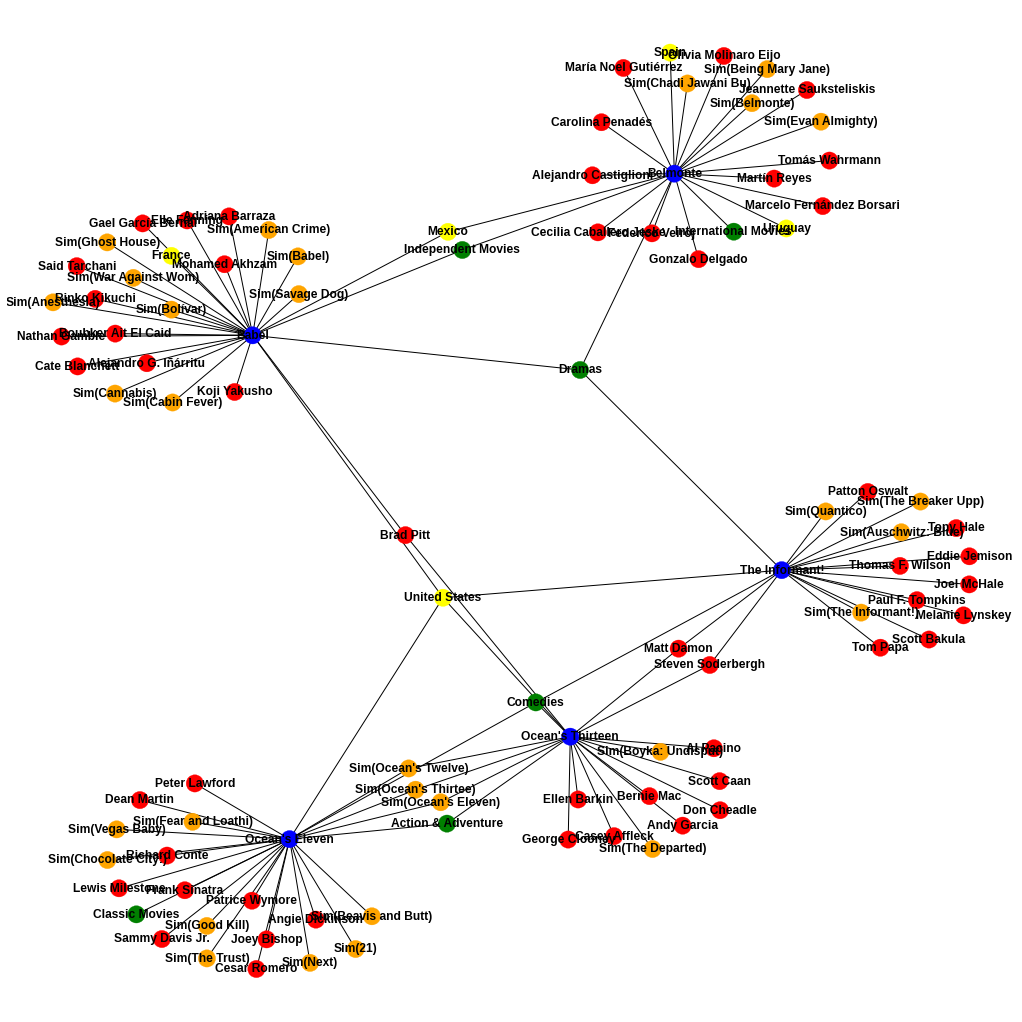

In [31]:
reco=list(result.index[:4].values)
reco.extend(["Belmonte"])
sub_graph = get_all_adj_nodes(reco)
draw_sub_graph(sub_graph)